<a href="https://colab.research.google.com/github/krikorantranik/Work/blob/main/DataDescription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep descriptive analysis, using a regression model to measure variable importance using a dataset of characteristic of the countries of origin of billionaires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install klib
import klib
import geopandas as geo
!pip install dabl
import dabl
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

Import the dataset

In [ ]:
maindataset = pd.read_csv("Billionaires_Statistics_Dataset.csv")
maindataset

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [ ]:
maindataset["gdp_country"] = maindataset["gdp_country"].astype(str).str.replace('\$','').astype(str).str.replace(' ','').astype(str).str.replace(',','')
maindataset["gdp_country"] = pd.to_numeric(maindataset["gdp_country"], errors='coerce')
maindataset["selfMade"] = maindataset["selfMade"].astype(str)
print(maindataset)
print(maindataset.columns)

      rank  finalWorth               category                personName   age  \
0        1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1        2      180000             Automotive                 Elon Musk  51.0   
2        3      114000             Technology                Jeff Bezos  59.0   
3        4      107000             Technology             Larry Ellison  78.0   
4        5      106000  Finance & Investments            Warren Buffett  92.0   
...    ...         ...                    ...                       ...   ...   
2635  2540        1000             Healthcare                   Yu Rong  51.0   
2636  2540        1000        Food & Beverage    Richard Yuengling, Jr.  80.0   
2637  2540        1000          Manufacturing             Zhang Gongyun  60.0   
2638  2540        1000            Real Estate    Zhang Guiping & family  71.0   
2639  2540        1000            Diversified               Inigo Zobel  66.0   

            country        

<ipython-input-47-4e96c86be600>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  maindataset["gdp_country"] = maindataset["gdp_country"].astype(str).str.replace('\$','').astype(str).str.replace(' ','').astype(str).str.replace(',','')


Description distribution of numerical variables

<Axes: xlabel='population_country', ylabel='Density'>

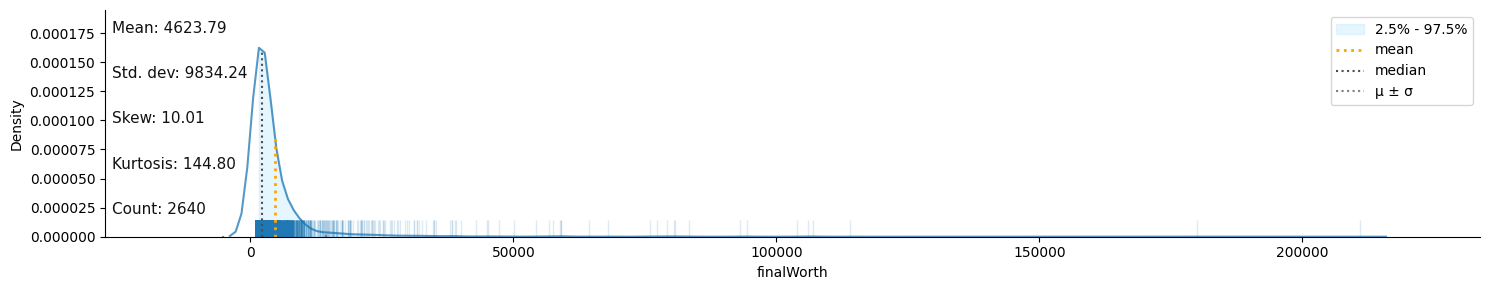

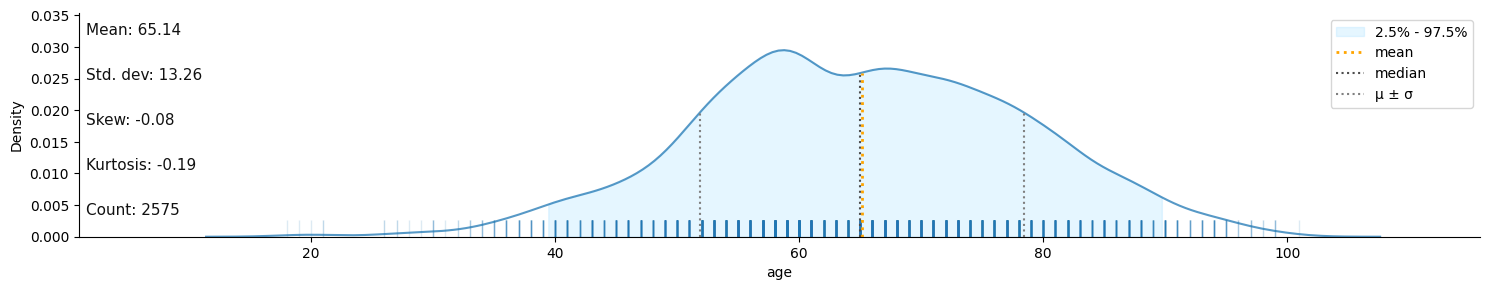

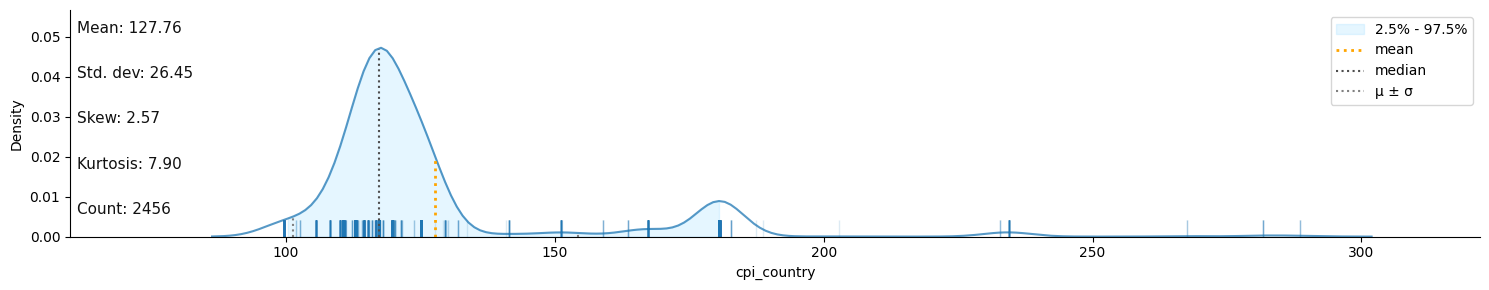

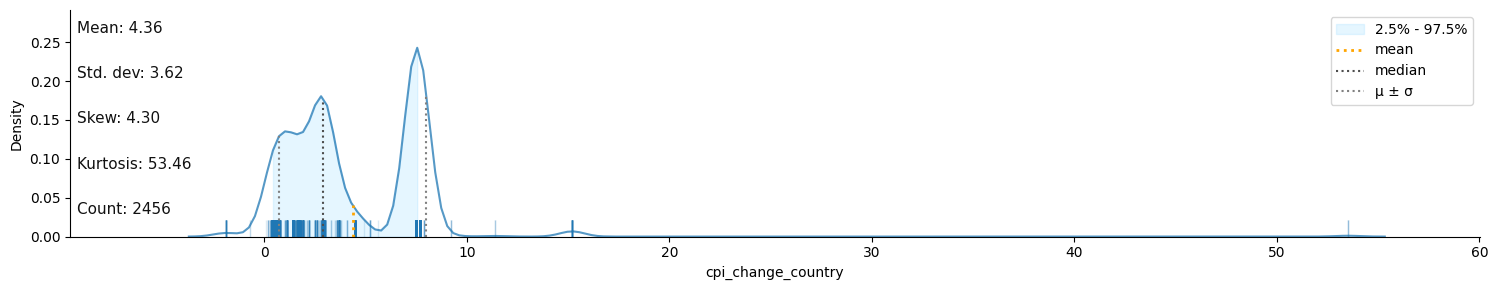

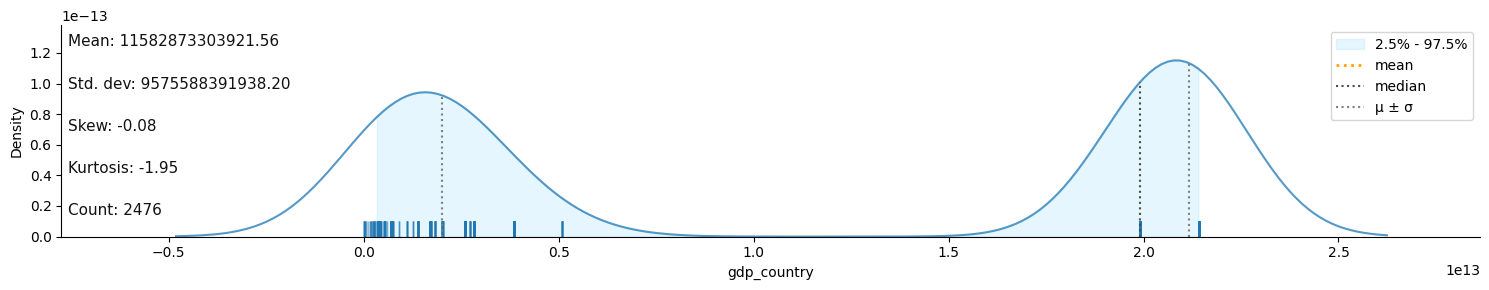

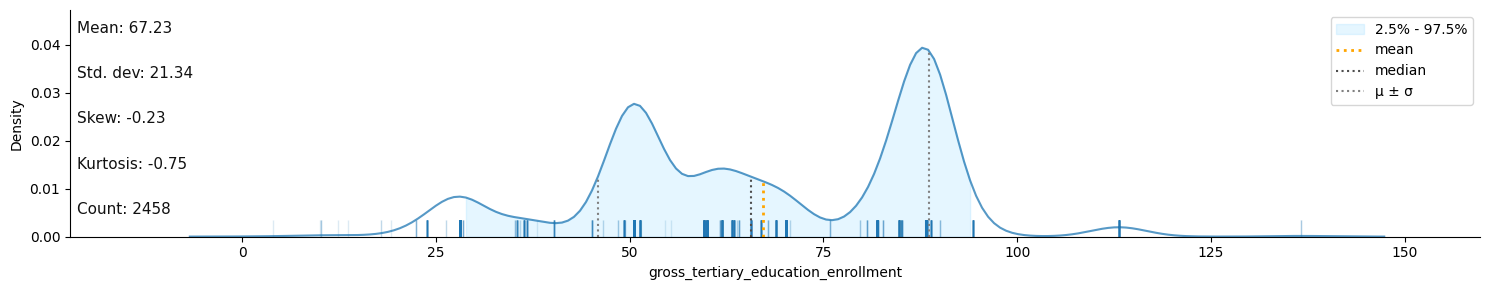

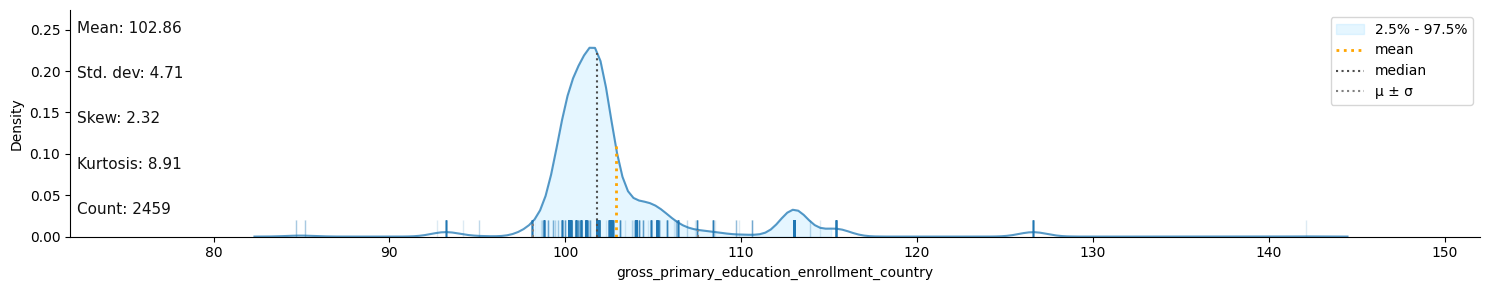

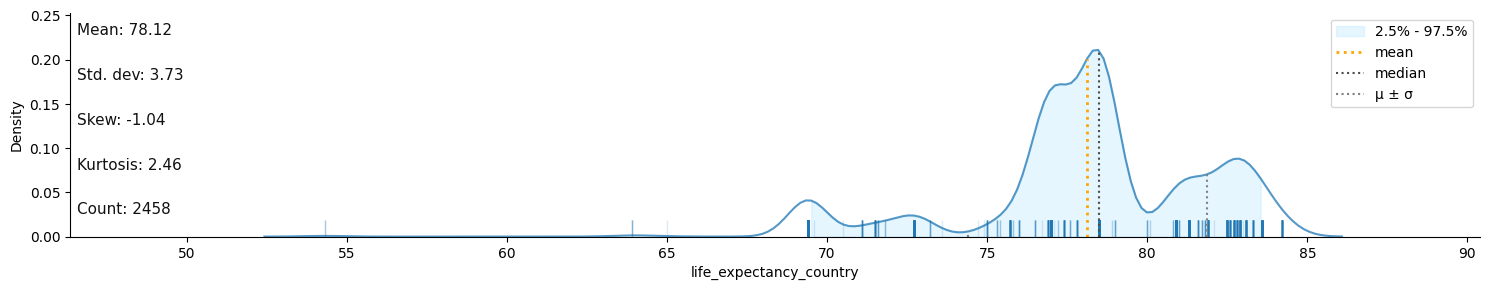

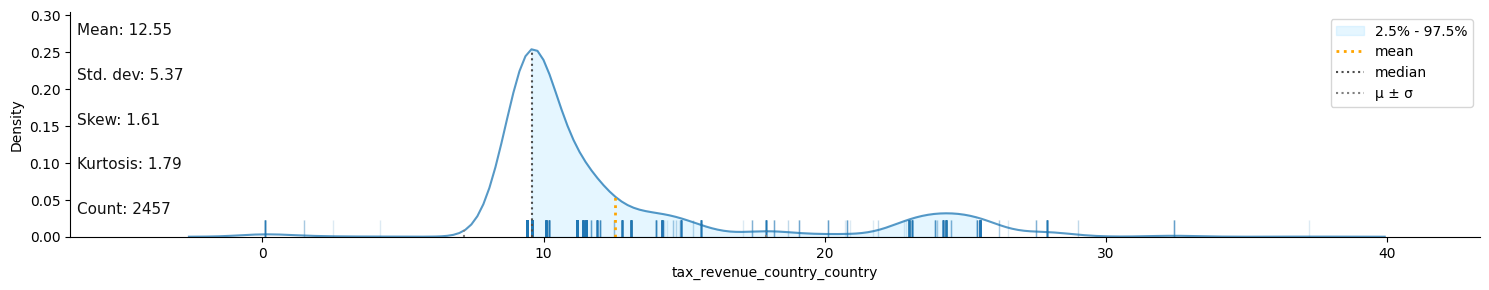

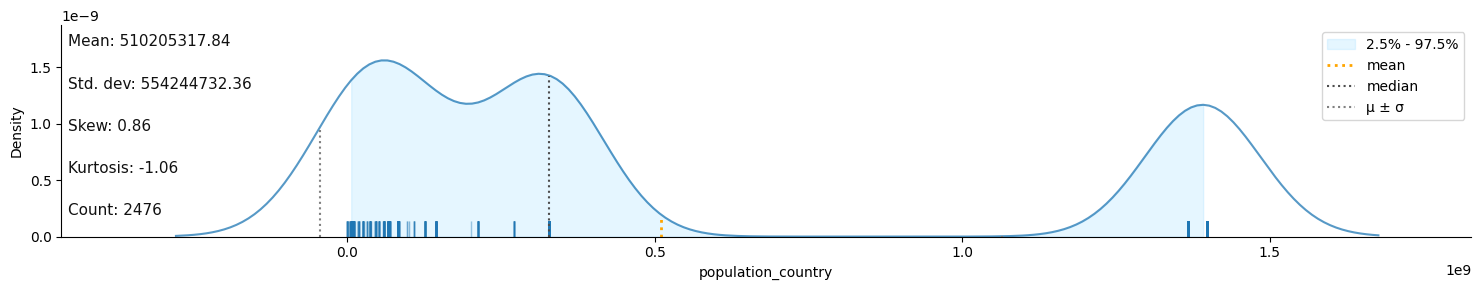

In [ ]:
klib.dist_plot(maindataset['finalWorth'])
klib.dist_plot(maindataset['age'])
klib.dist_plot(maindataset['cpi_country'])
klib.dist_plot(maindataset['cpi_change_country'])
klib.dist_plot(maindataset['gdp_country'])
klib.dist_plot(maindataset['gross_tertiary_education_enrollment'])
klib.dist_plot(maindataset['gross_primary_education_enrollment_country'])
klib.dist_plot(maindataset['life_expectancy_country'])
klib.dist_plot(maindataset['tax_revenue_country_country'])
klib.dist_plot(maindataset['population_country'])


I like that these results came up since it allows me to explain a couple of things.

If we look at the current state here, we could conclude that billionaires appear in countries that are very rich or very poor, or small and big, and not in medium population or revenue.

Well, that conclusion will be drawn on incomplete data, and so probably inaccurate, since we don't have in this dataset information to obtain the distribution of the data of all countries, as well that many billionaires could come from the same country, which skews the data in favor of a value (we will see that when analyzing the categorical variables).

It is important not to jump to conclusions based on incomplete data. The value of our analysis is limited always by the availability of data, and we need to make that point clear to the stakeholders.

It is the responsibility of a good analyst to always describe the limits of the data and the assumptions made when writing their reports.

Description of categorical variables

GridSpec(6, 4)

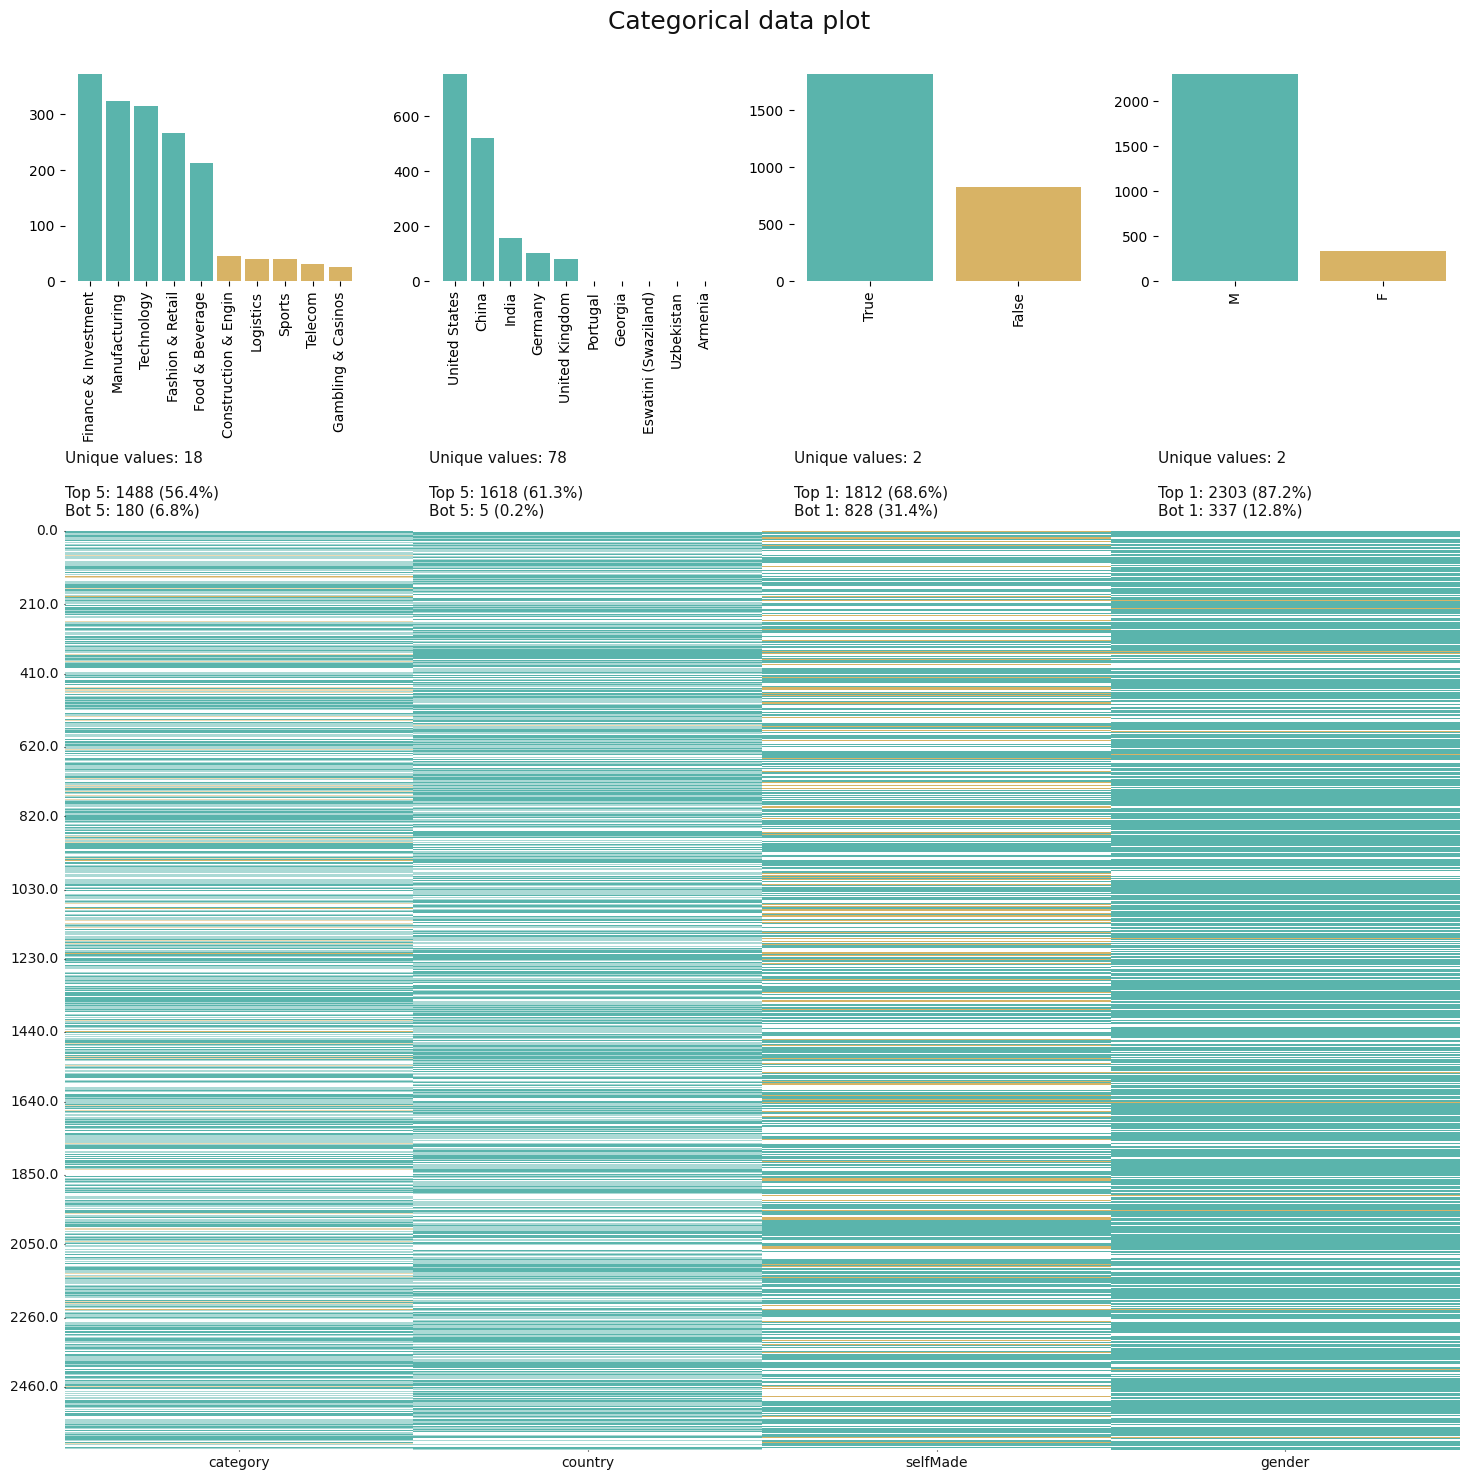

In [ ]:
klib.cat_plot(maindataset[['category','country','selfMade','gender']], top=5, bottom=5)

This map shows the location of billionaires showing the total wealth they hold by country by country

<ipython-input-41-3be6137d5ba8>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = geo.read_file(geo.datasets.get_path("naturalearth_lowres"))


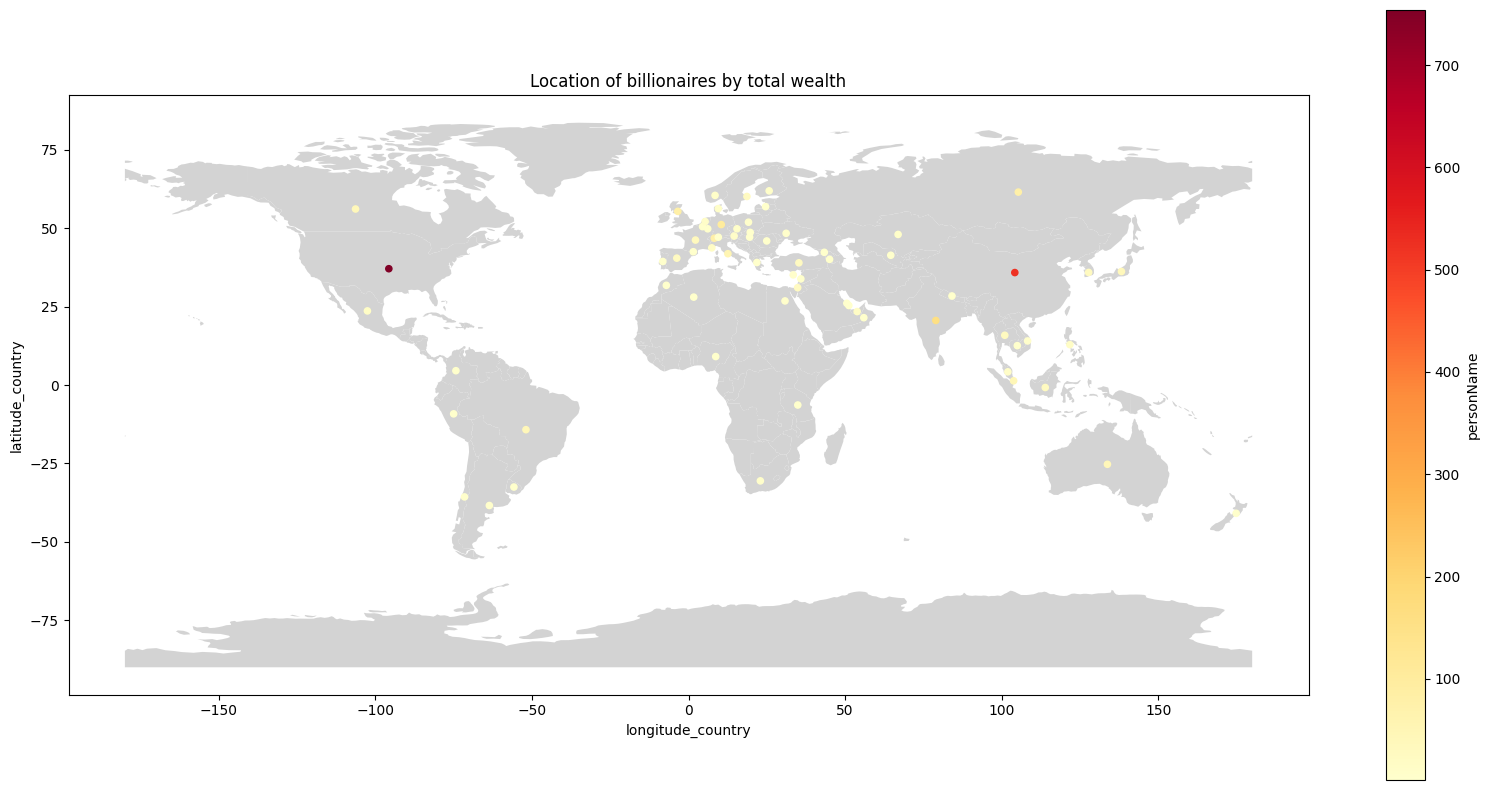

In [ ]:
locationdf = maindataset.groupby(["longitude_country","latitude_country"])["personName"].count()
locationdf = locationdf.reset_index(drop=False)

fig, ax = plt.subplots(figsize=(20,10))
countries = geo.read_file(geo.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)
locationdf.plot(x="longitude_country", y="latitude_country", kind="scatter",c="personName", colormap="YlOrRd",title=f"Location of billionaires",ax=ax)
plt.show()

It is interesting to see the same data as percentage of the country's GDP.

<ipython-input-42-a40c7bd58201>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = geo.read_file(geo.datasets.get_path("naturalearth_lowres"))


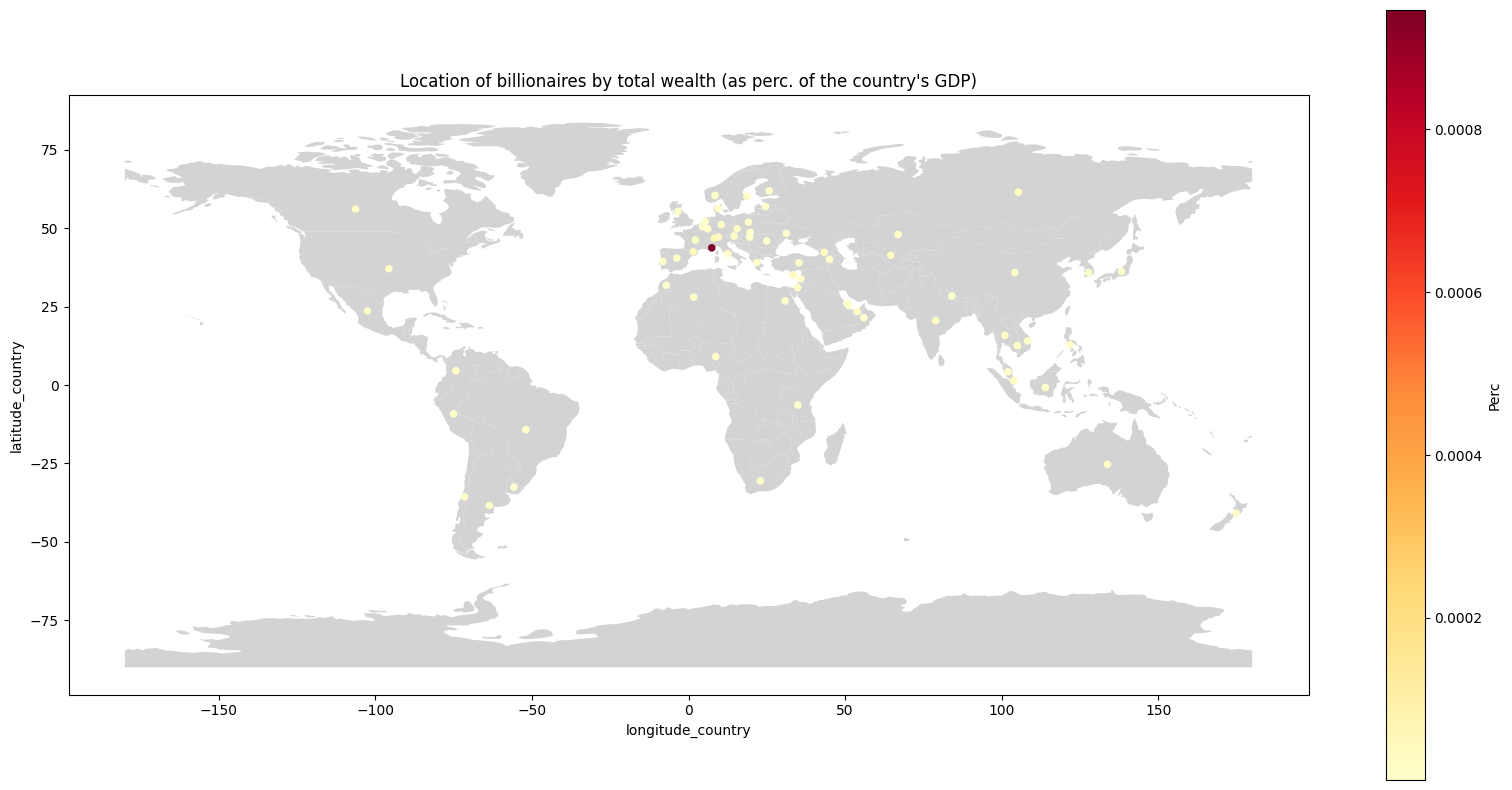

In [ ]:
locationdf = maindataset.groupby(["longitude_country","latitude_country"]).sum("finalWorth")
locationdf = maindataset.groupby(["longitude_country","latitude_country"]).agg(finalWorth=('finalWorth', np.sum),gdp_country=('gdp_country', np.mean))
locationdf['Perc'] = 100.000*locationdf['finalWorth']/locationdf['gdp_country']
locationdf = locationdf.reset_index(drop=False)

fig, ax = plt.subplots(figsize=(20,10))
countries = geo.read_file(geo.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)
locationdf.plot(x="longitude_country", y="latitude_country", kind="scatter",c="Perc", colormap="YlOrRd",title=f"Location of billionaires by total wealth (as perc. of the country's GDP)",ax=ax)
plt.show()

Supposing the target is the billionaire's wealth, let's correlate the numerical features to it and see how they perform

<Axes: title={'center': 'Feature-correlation (pearson)'}>

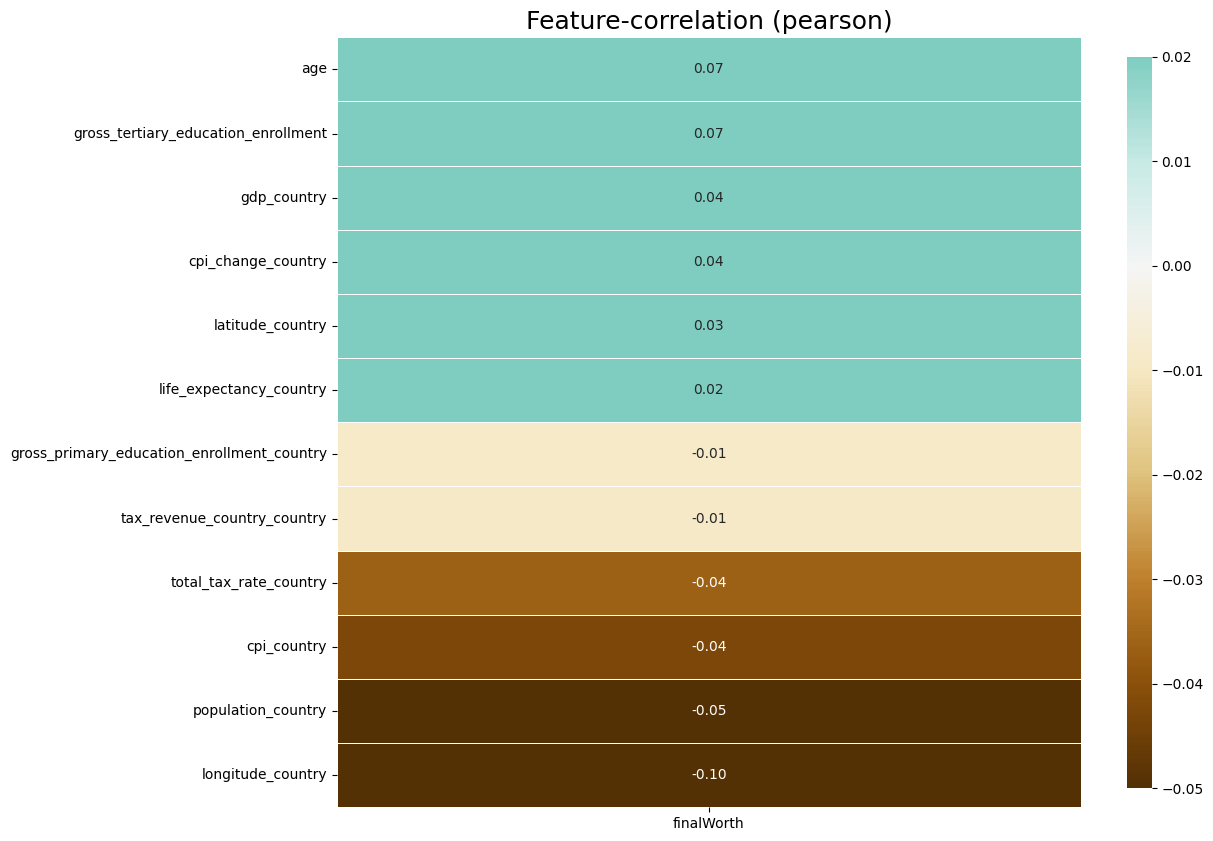

In [ ]:
maindatasetC = maindataset[['finalWorth', 'category', 'age', 'country',
       'selfMade', 'gender', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country']]

klib.corr_plot(maindatasetC, target='finalWorth')

The fact that latitude is number 5 shows that there is a different between the global north and south. Again, this difference is even worse in real life, since here we are missing the data of the countries with NO billionaires.

I am making box plots for the categorical values

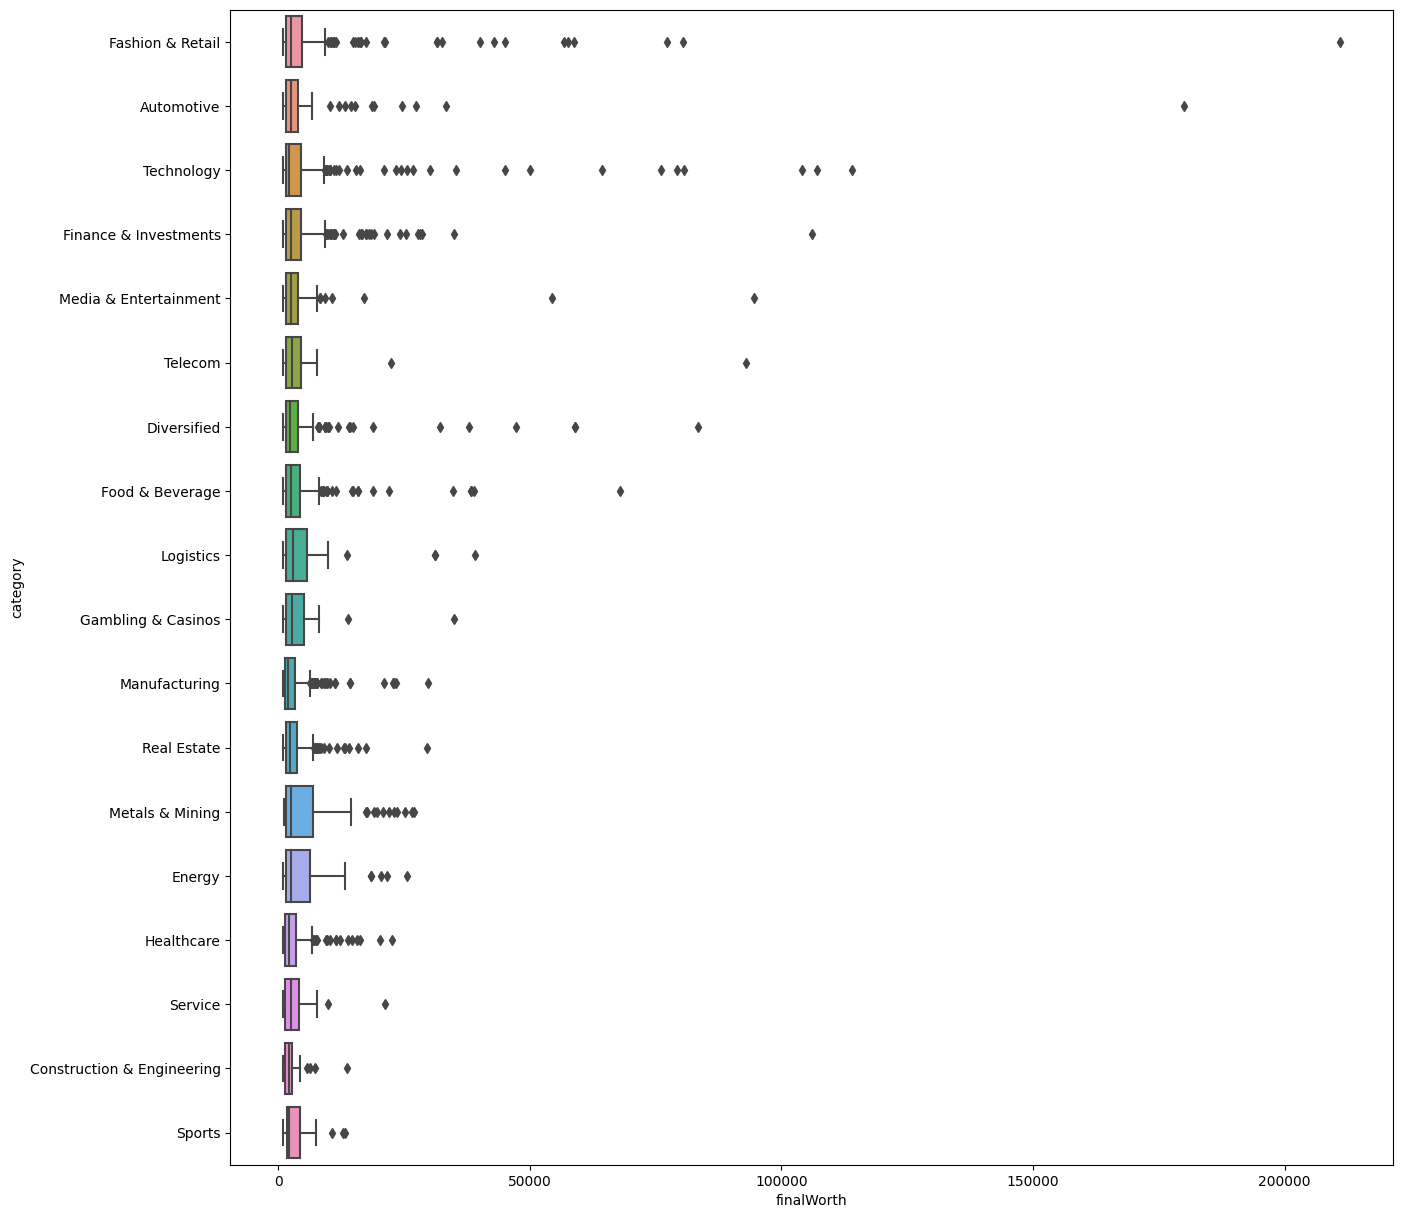

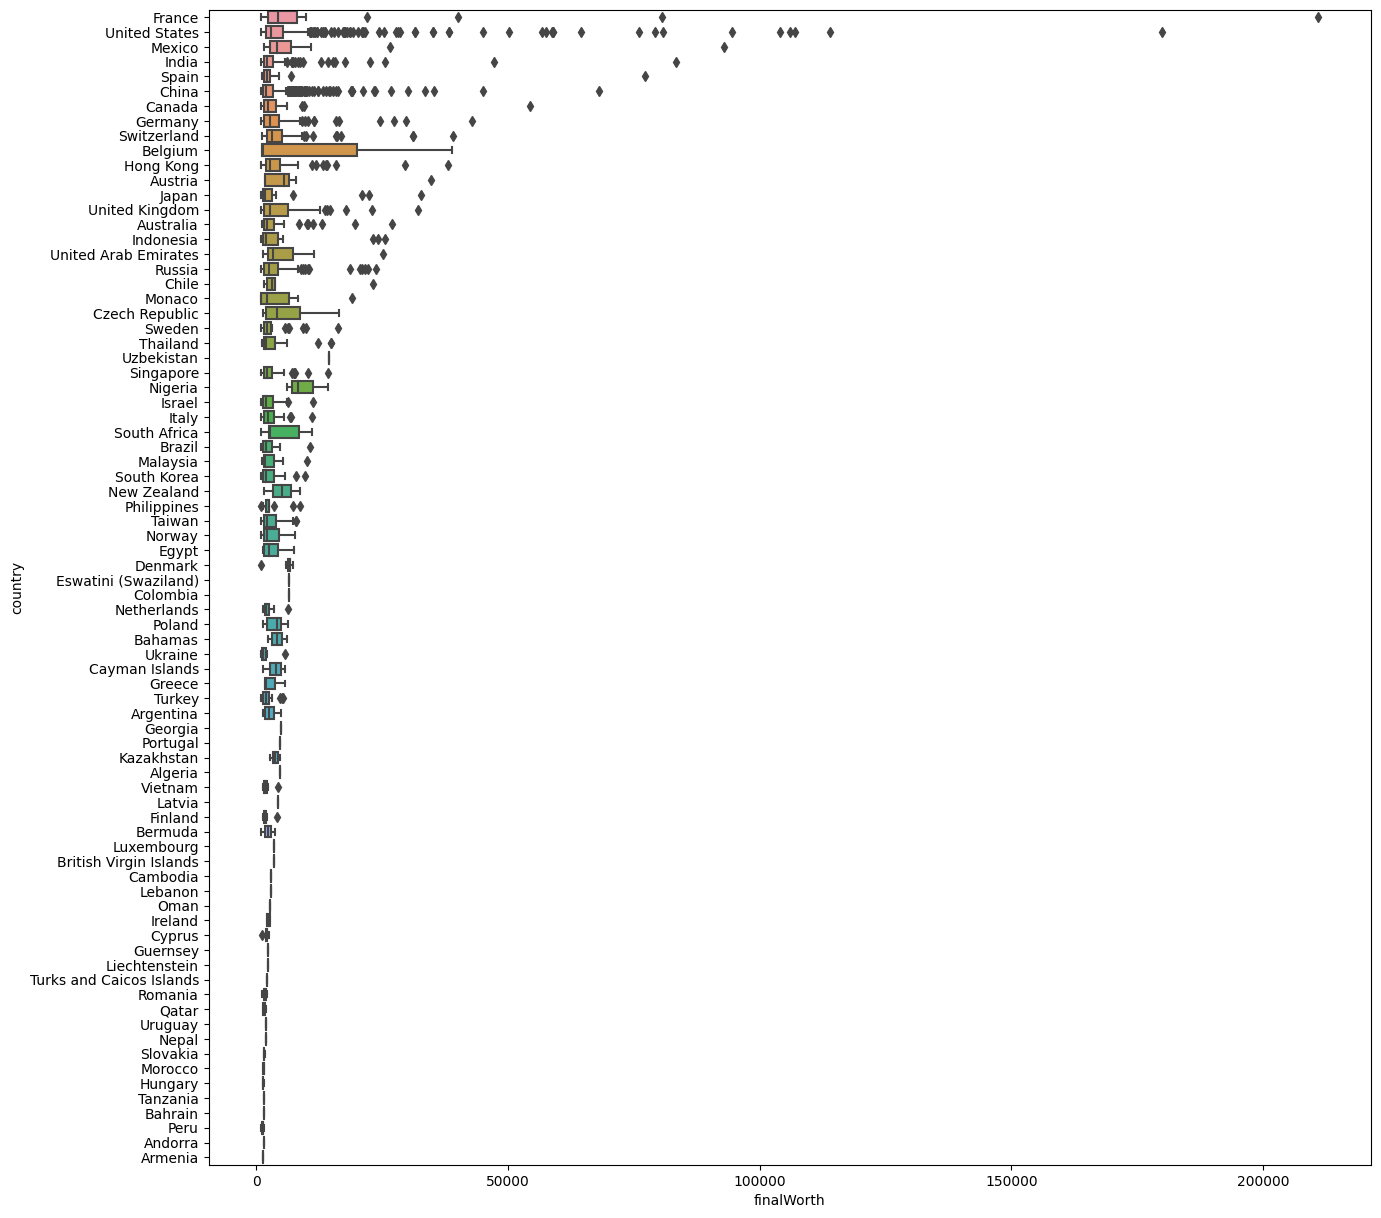

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(data=maindatasetC, x="finalWorth", y="category")
plt.figure(figsize=(15,15))
ax = sns.boxplot(data=maindatasetC, x="finalWorth", y="country")

This shows the countries and industries where the billionaires, if they exist, tend to be richer.

It does not mean that the people in those industries and countries are richer in any way, or says anything about the number of billionaires. Those are different data points.

If we want to find the predictors of a billionaire's wealth, I can use a random forest and then explain the variable weight in the model, but first we need to transform (encode) the columns so that the models can read them

In [ ]:
num_columns = ['age', 'cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country',
 'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country']
cat_columns = ['category', 'country', 'selfMade', 'gender']
cat_preprocessor = OneHotEncoder(handle_unknown="ignore")
num_preprocessor = StandardScaler()
preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", cat_preprocessor, cat_columns),
        ("standard_scaler", num_preprocessor, num_columns),
    ])

train = maindatasetC.copy()
train = train.dropna()

X_train = train[['category', 'age', 'country',
       'selfMade', 'gender', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country']]
Y_train = train[['finalWorth']]

X = pd.DataFrame.sparse.from_spmatrix(preprocessor.fit_transform(X_train))
catnames = preprocessor.transformers_[0][1].get_feature_names_out(cat_columns).tolist()
numnames = preprocessor.transformers_[1][1].get_feature_names_out(num_columns).tolist()
featnames = catnames + numnames

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, Y_train)

<ipython-input-114-d565ac10de4d>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, Y_train)


RandomForestRegressor()

Plot the variables importances

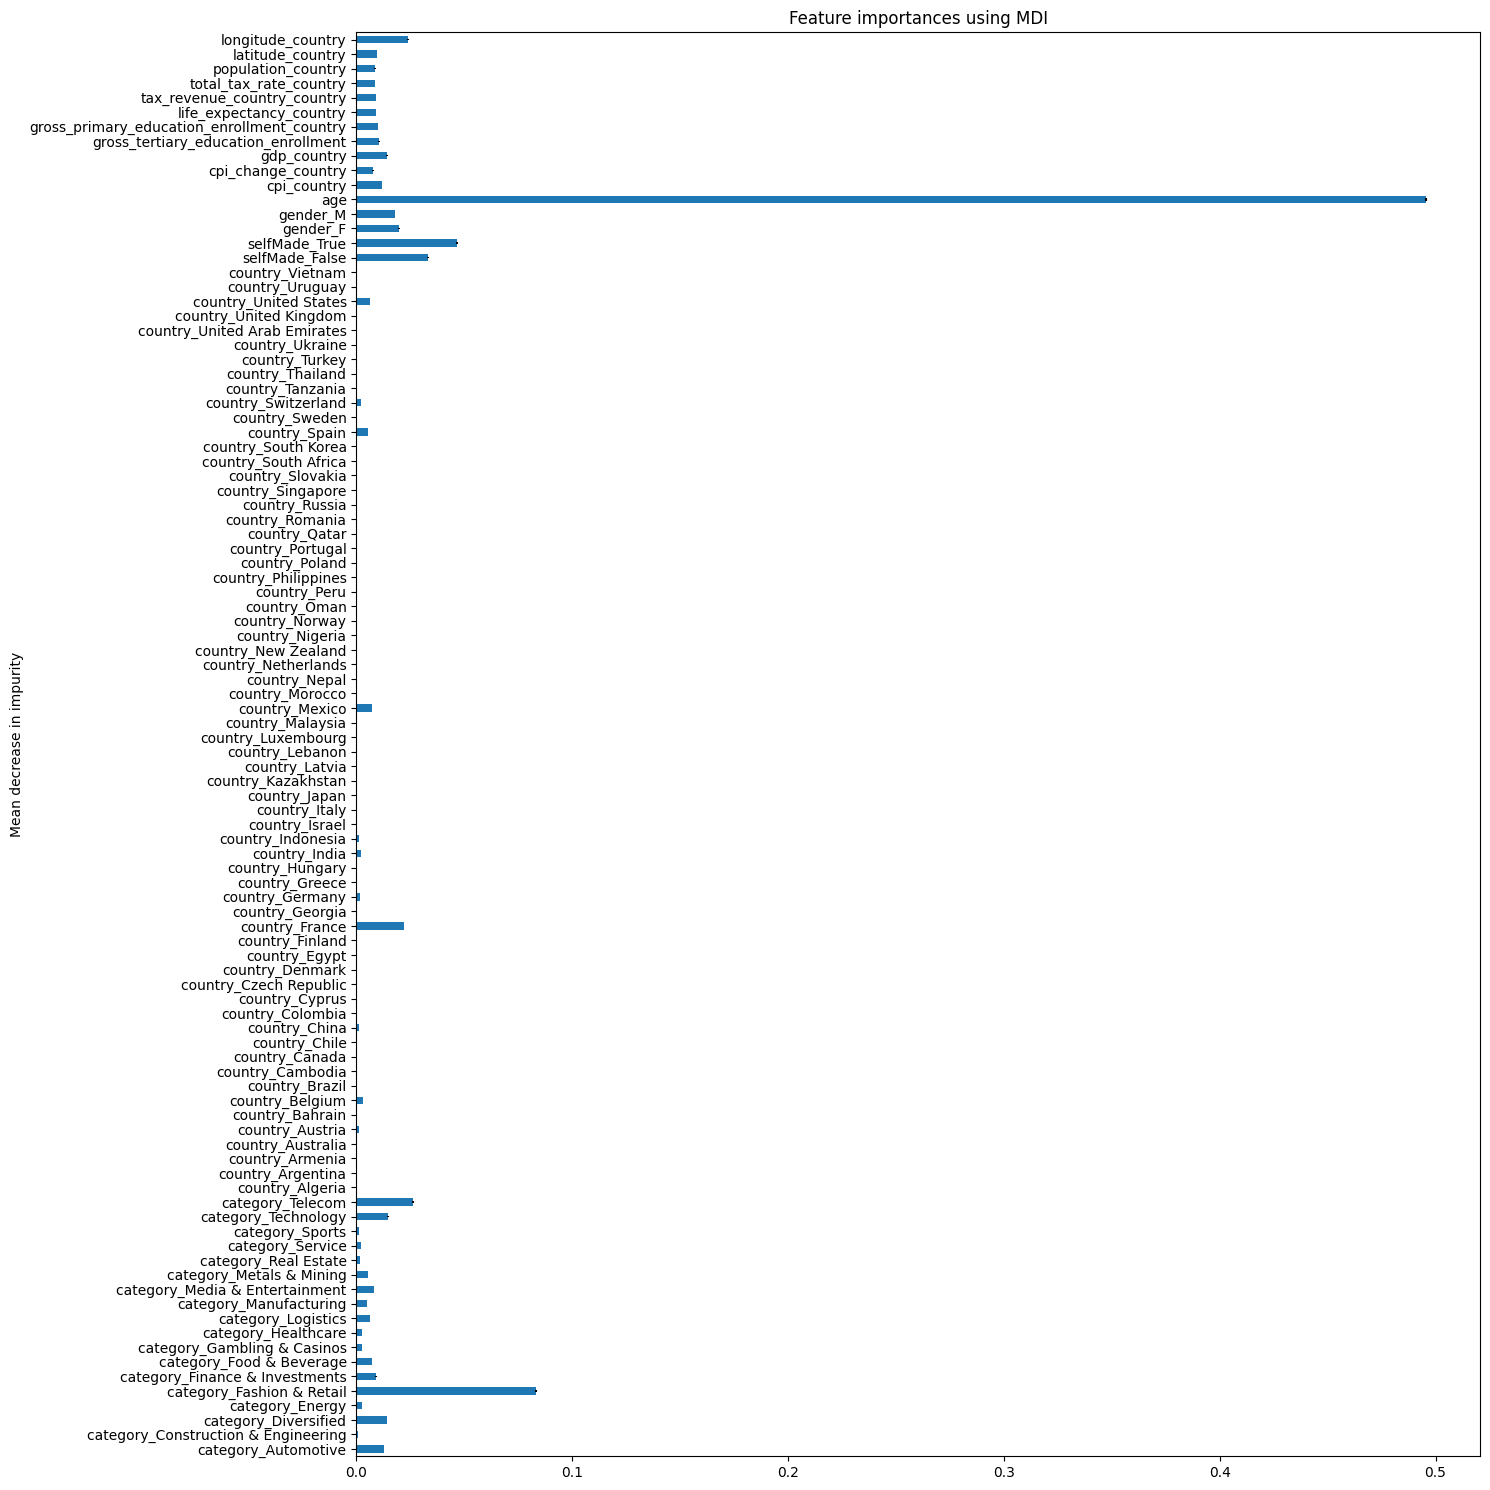

In [ ]:
imp = rf.feature_importances_
imp = pd.Series(imp, index=featnames)
std = pd.Series(np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0), index=featnames)
fig, ax = plt.subplots()
imp.plot(kind='barh', yerr=std, ax=ax, figsize=(15,15))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()